In [2]:
import h5py    
import numpy as np  
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Axes
from pathlib import Path
import seaborn as sns
import matplotlib.patches as patches
# Importing Pandas to create DataFrame
import pandas as pd

In [3]:
# define colours
col_cons = '#E71D76'
col_prod ='#3172B8'

In [4]:
# Data computed with the code Data/ComputeATPconcentrationFig3A
# Data Folder can be downloaded from 10.5281/zenodo.14187063
df = pd.read_csv('./Data/Fig2DATP_concentration_production_consumption_27102024.csv')
df

,ids,etype,layer,synapse_class,x,y,z,fin_ATP_consumed,fin_ATP_produced,spikes_met,mean_ATP_consumed,mean_ATP_produced,spikes_met_binned
0,15,bNAC,1,INH,2084.624393,1059.532151,-683.156252,0.005813,0.007301,0,0.004581,0.007667,0
1,9688,cADpyr,3,EXC,2152.568740,644.909169,-928.011106,0.006441,0.007587,0,0.005242,0.007973,0
2,19377,cNAC,3,INH,2124.534901,977.777711,-902.898927,0.006094,0.006613,0,0.005130,0.007560,0
3,29550,cADpyr,6,EXC,2311.046658,1033.548804,-1922.301593,0.006035,0.008445,1,0.004554,0.008249,0
4,40058,cADpyr,6,EXC,2154.322095,1035.741302,-1914.334943,0.005830,0.007911,0,0.004479,0.008028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27957,87146,cADpyr,2,EXC,2091.040827,657.538143,-799.599805,0.005403,0.006217,0,0.004502,0.007028,0
27958,96387,dSTUT,5,INH,2347.780136,1120.580718,-1767.094450,0.008027,0.018166,3,0.005520,0.012799,1-5
27959,105473,cADpyr,5,EXC,2208.193833,850.692110,-1673.365599,0.006065,0.007634,2,0.004872,0.008137,1-5
27960,114402,cADpyr,5,EXC,2202.135787,922.822707,-1590.891189,0.006028,0.007647,0,0.004845,0.007769,0


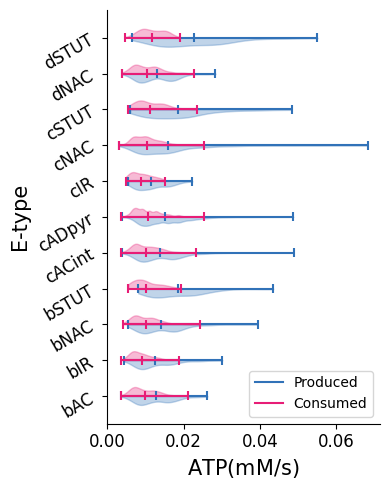

In [5]:
import matplotlib.lines as mlines

# Create a figure and axes for the plot
fig, axes = plt.subplots(figsize=(4, 5))

# Data for ATP produced (horizontal violins)
dataset = [df[df.etype == i ]["fin_ATP_produced"].values for i in np.unique(df['etype'])]
v1 = axes.violinplot(dataset, points=100, positions=np.arange(0, len(dataset)),
                     showmeans=True, showextrema=True, showmedians=False, vert=False)  # Set vert=False for horizontal violins

# Color violins and clip them for ATP produced
for b in v1['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 1])  # Adjust for horizontal plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], -np.inf, m)
    b.set_color(col_prod)
    b.set_edgecolor(col_prod)

# Data for ATP consumed (horizontal violins)
dataset_ndm = [df[df.etype == i ]["fin_ATP_consumed"].values for i in np.unique(df['etype'])]
v2 = axes.violinplot(dataset_ndm, points=100, positions=np.arange(0, len(dataset_ndm)),
                     showmeans=True, showextrema=True, showmedians=False, vert=False)  # Set vert=False for horizontal violins

# Color violins and clip them for ATP consumed
for b in v2['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 1])  # Adjust for horizontal plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], m, np.inf)
    b.set_color(col_cons)
    b.set_edgecolor(col_cons)

# Make all violin statistics marks (means, bars) colored accordingly
for partname in ['cbars', 'cmins', 'cmaxes', 'cmeans']:
    v1[partname].set_edgecolor(col_prod)
    v2[partname].set_edgecolor(col_cons)

# Set y-ticks and labels (x and y are switched now)
axes.set_yticks(np.arange(len(np.unique(df['etype']))), labels=np.unique(df['etype']), rotation=30, fontsize=12)
axes.tick_params(axis='both', labelsize=12)
axes.set_ylabel('E-type', fontsize=15)
axes.set_xlabel('$\mathrm{ATP} (\mathrm{mM}/\mathrm{s})$', fontsize=15)

# Hide right and top spines for a cleaner look
axes.spines[['right', 'top']].set_visible(False)

# Add a legend
prod_patch = mlines.Line2D([], [], color=col_prod, label='Produced')
cons_patch = mlines.Line2D([], [], color=col_cons, label='Consumed')
axes.legend(handles=[prod_patch, cons_patch], loc='lower right')

# Tight layout and save the plot
fig.tight_layout()
resolution_value = 1200
#plt.savefig("./RESULTS/Figure2d.pdf", format="pdf", dpi=resolution_value, bbox_inches='tight')


In [6]:
# Compute mean or median for ATP produced and ATP consumed for each E-type
mean_atp_prod = df.groupby('etype')['fin_ATP_produced'].mean()  # Mean ATP produced per E-type
mean_atp_cons = df.groupby('etype')['fin_ATP_consumed'].mean()  # Mean ATP consumed per E-type

# Optionally, you can also calculate the median
median_atp_prod = df.groupby('etype')['fin_ATP_produced'].median()  # Median ATP produced per E-type
median_atp_cons = df.groupby('etype')['fin_ATP_consumed'].median()  # Median ATP consumed per E-type

print("Mean ATP Produced by E-type:\n", mean_atp_prod)
print("Mean ATP Consumed by E-type:\n", mean_atp_cons)

Mean ATP Produced by E-type:
 etype
bAC       0.012752
bIR       0.012568
bNAC      0.014143
bSTUT     0.018429
cACint    0.013917
cADpyr    0.015069
cIR       0.011529
cNAC      0.015952
cSTUT     0.018644
dNAC      0.013084
dSTUT     0.022623
Name: fin_ATP_produced, dtype: float64
Mean ATP Consumed by E-type:
 etype
bAC       0.009773
bIR       0.008990
bNAC      0.010096
bSTUT     0.010266
cACint    0.010236
cADpyr    0.010782
cIR       0.008943
cNAC      0.010392
cSTUT     0.011202
dNAC      0.010375
dSTUT     0.011729
Name: fin_ATP_consumed, dtype: float64


In [7]:
# Identify the E-type that consumes the most and least ATP
most_consumed = mean_atp_cons.idxmax()  # E-type with the highest ATP consumed
least_consumed = mean_atp_cons.idxmin()  # E-type with the lowest ATP consumed

# Identify the E-type that produces the most and least ATP
most_produced = mean_atp_prod.idxmax()  # E-type with the highest ATP produced
least_produced = mean_atp_prod.idxmin()  # E-type with the lowest ATP produced

print(f"Most ATP consumed by E-type: {most_consumed} with {mean_atp_cons[most_consumed]} mM/s")
print(f"Least ATP consumed by E-type: {least_consumed} with {mean_atp_cons[least_consumed]} mM/s")
print(f"Most ATP produced by E-type: {most_produced} with {mean_atp_prod[most_produced]} mM/s")
print(f"Least ATP produced by E-type: {least_produced} with {mean_atp_prod[least_produced]} mM/s")

Most ATP consumed by E-type: dSTUT with 0.011729070585714286 mM/s
Least ATP consumed by E-type: cIR with 0.00894331273902439 mM/s
Most ATP produced by E-type: dSTUT with 0.022622955726190476 mM/s
Least ATP produced by E-type: cIR with 0.011528573395121951 mM/s


In [8]:
# Calculate the total ATP produced and consumed across all E-types
total_atp_prod = df['fin_ATP_produced'].sum()
total_atp_cons = df['fin_ATP_consumed'].sum()

# Calculate the percentage ATP produced and consumed for each E-type
percent_atp_prod = (df.groupby('etype')['fin_ATP_produced'].sum() / total_atp_prod) * 100
percent_atp_cons = (df.groupby('etype')['fin_ATP_consumed'].sum() / total_atp_cons) * 100

print("Percentage ATP Produced by each E-type:\n", percent_atp_prod)
print("Percentage ATP Consumed by each E-type:\n", percent_atp_cons)


Percentage ATP Produced by each E-type:
 etype
bAC        0.876439
bIR        0.502114
bNAC       1.025821
bSTUT      0.433882
cACint     3.207055
cADpyr    87.325445
cIR        0.224819
cNAC       3.281476
cSTUT      0.988773
dNAC       1.456280
dSTUT      0.677896
Name: fin_ATP_produced, dtype: float64
Percentage ATP Consumed by each E-type:
 etype
bAC        0.942656
bIR        0.504074
bNAC       1.027709
bSTUT      0.339198
cACint     3.310409
cADpyr    87.683985
cIR        0.244748
cNAC       2.999900
cSTUT      0.833661
dNAC       1.620438
dSTUT      0.493221
Name: fin_ATP_consumed, dtype: float64


In [9]:
# Identify the E-type that consumes the most and least ATP
most_consumed = percent_atp_cons.idxmax()  # E-type with the highest ATP consumed
least_consumed = percent_atp_cons.idxmin()  # E-type with the lowest ATP consumed

# Identify the E-type that produces the most and least ATP
most_produced = mean_atp_prod.idxmax()  # E-type with the highest ATP produced
least_produced = mean_atp_prod.idxmin()  # E-type with the lowest ATP produced

print(f"Percentage Most ATP consumed by E-type: {most_consumed} with {mean_atp_cons[most_consumed]} mM/s")
print(f"Percentage Least ATP consumed by E-type: {least_consumed} with {mean_atp_cons[least_consumed]} mM/s")
print(f"Percentage Most ATP produced by E-type: {most_produced} with {mean_atp_prod[most_produced]} mM/s")
print(f"Percentage Least ATP produced by E-type: {least_produced} with {mean_atp_prod[least_produced]} mM/s")

Percentage Most ATP consumed by E-type: cADpyr with 0.010781835355544155 mM/s
Percentage Least ATP consumed by E-type: cIR with 0.00894331273902439 mM/s
Percentage Most ATP produced by E-type: dSTUT with 0.022622955726190476 mM/s
Percentage Least ATP produced by E-type: cIR with 0.011528573395121951 mM/s


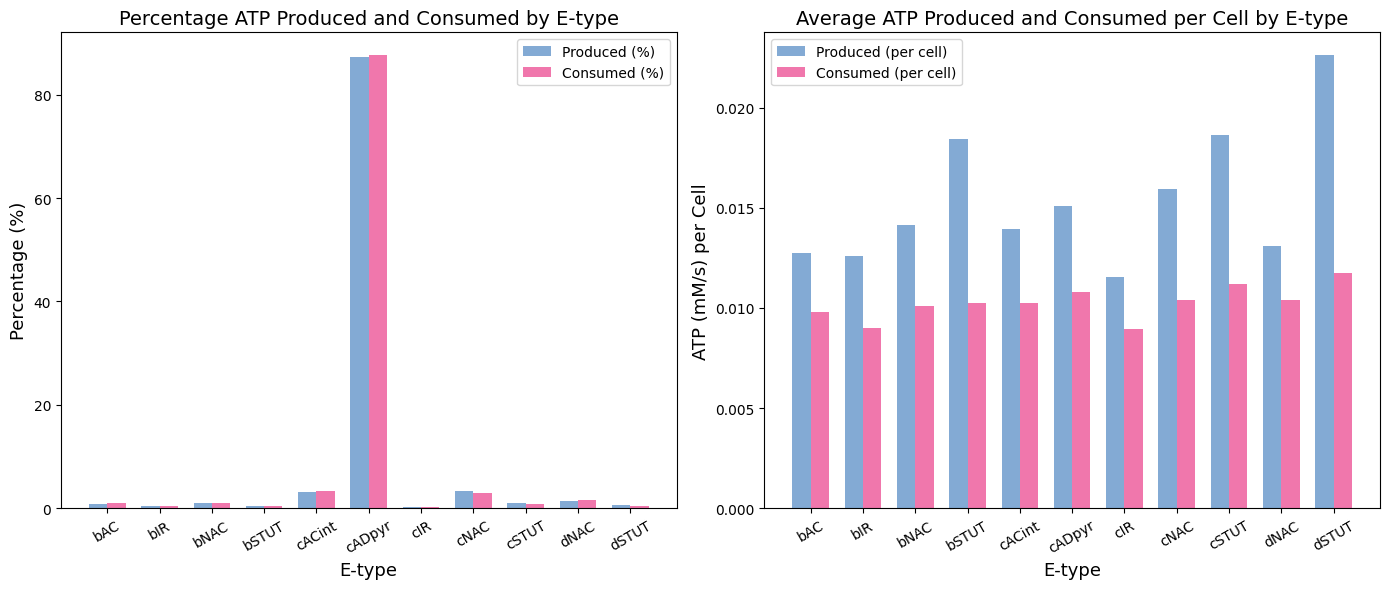

In [10]:
import numpy as np

# Create a single figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Offset for placing bars side by side
bar_width = 0.35  # Width of the bars for each category

# Data for percentage ATP produced and consumed
x = np.arange(len(percent_atp_prod))  # Set up positions for each bar
axes[0].bar(x - bar_width/2, percent_atp_prod.values, width=bar_width, color=col_prod, alpha=0.6, label="Produced (%)")
axes[0].bar(x + bar_width/2, percent_atp_cons.values, width=bar_width, color=col_cons, alpha=0.6, label="Consumed (%)")
axes[0].set_xlabel('E-type', fontsize=13)
axes[0].set_ylabel('Percentage (%)', fontsize=13)
axes[0].set_title('Percentage ATP Produced and Consumed by E-type', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(percent_atp_prod.index, rotation=30)
axes[0].legend()

# Data for average ATP produced and consumed per cell
x = np.arange(len(mean_atp_prod))  # Set up positions for each bar
axes[1].bar(x - bar_width/2, mean_atp_prod.values, width=bar_width, color=col_prod, alpha=0.6, label="Produced (per cell)")
axes[1].bar(x + bar_width/2, mean_atp_cons.values, width=bar_width, color=col_cons, alpha=0.6, label="Consumed (per cell)")
axes[1].set_xlabel('E-type', fontsize=13)
axes[1].set_ylabel('ATP (mM/s) per Cell', fontsize=13)
axes[1].set_title('Average ATP Produced and Consumed per Cell by E-type', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(mean_atp_prod.index, rotation=30)
axes[1].legend()

# Adjust layout and display
plt.tight_layout()

#plt.savefig("./Supplementary_Figures/SFigure2d.pdf", format="pdf", dpi=resolution_value, bbox_inches='tight')